In [1]:
# Standard imports 
import os
import pandas as pd
import numpy as np
import re # Regular expression    
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import nltk  # Natural language tool kit
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
#% matplotlib inline

### Case Study

In [2]:
dataset = pd.read_csv('C:\\JS\\Text Analytics\\Text_Mining\\Restaurant_Reviews.tsv', delimiter = '\t') 

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
dataset.shape

(1000, 2)

In [5]:
# Take a look at default stopwords of NLTK
nltk.download('stopwords')
  
from nltk.corpus import stopwords
STOPWORDS = set(STOPWORDS)
STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anparash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [6]:
STOPWORDS = stopwords.words('english')

In [7]:
STOPWORDS = set(STOPWORDS)
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
# Requirement where you need to add more words in the stop word dict 
STOPWORDS.update(["Aman", "Anil", "Black"])
STOPWORDS

{'Aman',
 'Anil',
 'Black',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',


In [9]:
# Data Cleaning block 

nltk.download('stopwords')
  
# to remove stopword
from nltk.corpus import stopwords
  
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
  
# Initialize empty array
# to append clean text 
corpus = [] 
  
# 1000 (reviews) rows to clean
for i in range(0, 1000): 
      
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
      
    # convert all cases to lower cases
    review = review.lower() 
      
    # split to array(default delimiter is " ")
    review = review.split() 
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer() 
      
    # loop for stemming each word
    # in string array at ith row    
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))] 
                  
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review)  
      
    # append each string to create
    # array of clean text 
    corpus.append(review) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anparash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
T1 = dataset['Review'][45]
print(T1)
T2 = re.sub('[^a-zA-Z]', ' ', T1)
print(T2)
T3 = T2.lower() 
print(T3)
T4 = T3.split() 
print(T4)
T5 =  review = [ps.stem(word) for word in T4 if not word in set(stopwords.words('english'))] 
print(T5)
T6 = ' '.join(T5)
print(T6)

The only thing I did like was the prime rib and dessert section.
The only thing I did like was the prime rib and dessert section 
the only thing i did like was the prime rib and dessert section 
['the', 'only', 'thing', 'i', 'did', 'like', 'was', 'the', 'prime', 'rib', 'and', 'dessert', 'section']
['thing', 'like', 'prime', 'rib', 'dessert', 'section']
thing like prime rib dessert section


#### Word Cloud

In [ ]:
# Word cloud is the visual to see which word is appearing most freq in corpus
# Only thing that is needed - ( Word, freq)

In [19]:
# Word Cloud 
# Word cloud on one single review 
dataset.Review[3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [20]:
# We need tokens or words and frequency of these words 

text = dataset.Review[3]

wordcloud = WordCloud().generate(text)
wordcloud

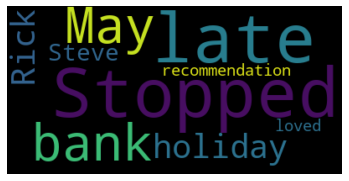

In [21]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

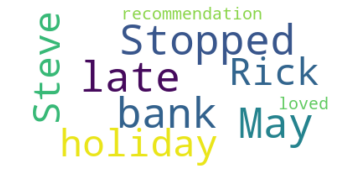

In [22]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
# Do it on all the reviews i.e. on entire corpus
text = " ".join(review for review in dataset.Review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 59314 words in the combination of all review.


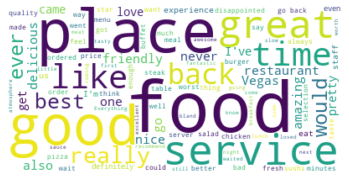

In [25]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Our cleaned reviews are in corpus object
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [28]:
# Creating the Bag of Words ( CV) model
# Count Vectorizer feature space 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # Initializing CV
X = cv.fit_transform(corpus).toarray() 
y = dataset.iloc[:, 1].values 

In [29]:
X.shape  # With CV approach we have 1565 features # Independent variable

(1000, 1565)

In [30]:
# Train and test split and building logistic regression model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

# Using CV approach for feature engineering and logistic regression model => Accuracy on test data is 77.2% 

0.772


# Count Vectorizer with bi-gram and logistic regression model 

In [31]:
# Creating the Bag of Words ( CV) model
# Count Vectorizer feature space 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range= (1,2)) # Initializing CV
X = cv.fit_transform(corpus).toarray() 
y = dataset.iloc[:, 1].values 


# Train and test split and building logistic regression model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

# With CV uni and bigram along with logistic regression model => Accuracy on test data is 82 % 

0.82


### Concept pickle - A way to deploy your model

In [45]:
# CV, uni and bigram along with logistic regression is giving you best accuracy 
# i.e final selected model in LR_model

import pickle

#Lets save the model as a pickle file/object
with open ('text classifier', 'wb') as picklefile: # write mode
    pickle.dump(LR_model, picklefile)

In [46]:
# This picklefile will be stored in your current working directory 
os.getcwd()

'C:\\Users\\anparash'

In [49]:
# To do prediction on new data, you need to load this pickle file 
with open ('text classifier', 'rb') as training_model:
    # write mode
    model = pickle.load(training_model)

In [50]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## TF-IDF with uni & bigram along with Logistic regression model 

In [32]:
# tf-idf and bigram
from sklearn.feature_extraction import text
tf=text.TfidfVectorizer(corpus,ngram_range=(1,2))
matrix_tfidf=tf.fit_transform(corpus)

C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also comb

In [33]:
X = matrix_tfidf

In [34]:
X.shape

(1000, 5634)

In [35]:
# Model created with tf-idf and uni+bigram
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

# TF-IDF with uni-gram and bi-gram + LR = 75.2% 

0.752


## TF-IDF, unigram and bigram also feature reduction and logistic regression 

In [36]:
matrix_tfidf.shape  # 5634 features and 1000 records 

(1000, 5634)

In [37]:
# Using SVD technique to reduce features 
import sklearn.decomposition as decomposition
svd=decomposition.TruncatedSVD(n_components=100)    # 100 components only 
matrix_reduced_svd=svd.fit_transform(matrix_tfidf)  # input of SVD is the Tf-idf + bigram

In [38]:
X = matrix_reduced_svd

In [39]:
X.shape

(1000, 100)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

# With this approach accuracy on test data is about 74% 

0.74


## Fitting a random forest classifier 
### TF-IDF, SVD dataset

In [41]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier
  
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results 
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy')
                              
model.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [42]:
# Predicting the Test set results
y_pred = model.predict(X_test)
  
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
cm

In [43]:
print(accuracy_score(y_test, y_pred))

0.724


In [ ]:
import spacy
# Word tokenization
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = en_core_web_md.load()

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

In [ ]:
os.chdir("C:\\JS\\Text Analytics\\case_study\\Interpreting-Machine-Learning-Models-master")

In [ ]:
#Stop words
#importing stop words from English language.
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:30])

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

In [ ]:
# Installing the pre-trained model 
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
# Part of Speech tagging ( POS)
# Tag the Entities in the text 
#!pip install spacy
import spacy 
from spacy import displacy
from collections import Counter 
import en_core_web_sm  # Pre trained model 
nlp = spacy.load("C:/Users/anparash/Anaconda/Anaconda3/Lib/site-packages/en_core_web_sm/en_core_web_sm-3.0.0/")

In [ ]:
# from conda 
#python -m spacy download en_core_web_lg
#python -m spacy download en_core_web_sm

In [ ]:
#!pip install en_core_web_sm

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp('European authoraties fined google a record $5.1 billion on Monday for some bad practice')

In [ ]:
print([(X.text, X.label_) for X in doc.ents])

In [ ]:
# In you text - you have a word call "bank" - Interpretation of this word bank is meaningless without context 

In [ ]:
doc = nlp('Anil has 1000 employees')
print([(X.text, X.label_) for X in doc.ents])

In [ ]:
doc = nlp('Anil is working with Google')
print([(X.text, X.label_) for X in doc.ents])

In [ ]:
displacy.render(nlp(str(doc)), jupyter = True, style = 'ent')

In [ ]:
# NER - Named Entity Recognition 

In [ ]:
doc1 = "Bennett Coleman & Co. Ltd was sold to sugar magnate Ramkrishna Dalmia of the then-famous industrial family, the Dalmiyas, for ₹20 million (US$280,000) in 1946, as India was becoming independent and the British owners were leaving.[19] In 1955 the Vivian Bose Commission of Inquiry found that Ramkrishna Dalmia, in 1947, had engineered the acquisition of the media giant Bennett Coleman & Co"

In [ ]:
displacy.render(nlp(str(doc1)), jupyter = True, style = 'ent')

In [ ]:
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)